In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from fafbseg import flywire
import pymaid
import navis
import numpy as np
from statannot import add_stat_annotation
import seaborn as sns
import scipy.stats as stats
import scikit_posthocs as sp

flywire.get_materialization_versions()

,id,datastack,status,expires_on,time_stamp,is_merged,valid,version
0,823,flywire_fafb_production,AVAILABLE,2024-01-11 04:10:00,2024-01-09 05:10:00,False,True,833
1,822,flywire_fafb_production,AVAILABLE,2024-01-13 04:10:00,2024-01-06 05:10:00,False,True,832
2,820,flywire_fafb_production,AVAILABLE,2024-02-07 04:10:00,2024-01-03 05:10:00,False,True,830
3,813,flywire_fafb_production,AVAILABLE,2024-01-17 04:10:00,2023-12-20 05:10:00,False,True,823
4,773,flywire_fafb_production,AVAILABLE,2121-11-10 07:10:00,2023-09-30 05:10:00,False,True,783
5,619,flywire_fafb_production,AVAILABLE,2121-11-10 07:10:00,2023-03-21 08:10:00,True,True,630
6,560,flywire_fafb_production,AVAILABLE,2121-11-10 07:10:00,2023-01-10 08:11:00,True,True,571
7,515,flywire_fafb_production,AVAILABLE,2121-11-10 07:10:00,2022-11-17 08:10:00,True,True,526
8,247,flywire_fafb_production,AVAILABLE,2121-02-18 08:10:00,2022-01-17 08:10:00,True,True,258


In [23]:
#connect your catmaid instance
instance=pymaid.CatmaidInstance('https://radagast.hms.harvard.edu/catmaidaedes',"")

INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


In [24]:
#initialize empty dataframe
flyneurons=pd.DataFrame(columns=['id', 'total cable length', 'cable length in glom', 'unilateral feedforward', 'bilateral left feedforward', 'bilateral right feedforward', 'recurrent connections', 'glomerulus'])


In [25]:
#load DM1 .ply files
dm1_l=navis.read_mesh("/home/jb534/pymaid_scripts/aedes/aedes/glom_meshes/DM1_R.ply", output='volume')


In [26]:
dm1neurons=[720575940619419757,720575940629918762, 720575940632224031, 720575940637447514, 720575940614559163, 720575940614559163, 720575940622651389, 720575940631240296,720575940623942119, 720575940627253865, 720575940639427416, 720575940605328230, 720575940625821758, 720575940636187054, 720575940620574305, 720575940637472053, 720575940630496975, 720575940623993836, 720575940622281399, 720575940627996315, 720575940622276791, 720575940630664273, 720575940627316303,720575940629350782,720575940606001074, 720575940635562096, 720575940624223888, 720575940629918762, 720575940643980910, 720575940627526735, 720575940606001074, 720575940635562096, 720575940627253865, 720575940626779644, 720575940643980910, 720575940630496975]

In [27]:
dm1_pn=720575940624688363

In [28]:
flywire.supervoxels_to_roots(flyneurons, progress=True, dataset='production')

array([], shape=(0, 8), dtype=int64)

In [29]:
for n in dm1neurons:
    #get cable length in the glomerulus
    skel=flywire.skeletonize_neuron(n, progress=False)
    skel_involume=navis.in_volume(skel, dm1_l)

    #get feedforward connectivity in the glomerulus
    feedforward_connectivity=flywire.synapses.fetch_adjacency(skel, targets=dm1_pn, dataset='production', min_score=65, progress=True)

    #extract values from the dataframes
    feedforward_value=int(feedforward_connectivity.iloc[0])


    #get recurrent connectivity in the glomerulus
    recurrent_connectivity=flywire.synapses.fetch_adjacency(skel_involume,targets=dm1neurons, dataset='production', min_score=65, progress=True)
    sum_recurrent=recurrent_connectivity.iloc[0].sum()

    #append to the dataframe
    flyneurons=flyneurons.append({'id':n, 'total cable length':skel.cable_length, 'cable length in glom':skel_involume.cable_length, 'unilateral feedforward':feedforward_value, 'recurrent connections':sum_recurrent, 'glomerulus':'DM1'}, ignore_index=True)


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


In [30]:
flycsv=flyneurons.to_csv('/home/jb534/pymaid_scripts/aedes/aedes/csvs/flyneuron_cable_inglom.csv')

In [31]:
#Glomerulus V
#load .ply
v_l=navis.read_mesh("/home/jb534/pymaid_scripts/aedes/aedes/glom_meshes/V_R.ply", output='volume')


In [32]:
vneurons=[720575940642968776, 720575940627586091, 720575940626822916, 720575940621315293, 720575940617067305, 720575940614548765, 720575940617989417, 720575940633817405, 720575940614053149, 720575940614037533, 720575940612901807, 720575940626329993, 720575940620411764, 720575940614054685, 720575940629644375, 720575940620511732, 720575940623854311, 720575940627817260, 720575940614548253, 720575940614053405, 720575940612700450, 720575940626822916, 720575940638026842, 720575940607239947, 720575940633509949,720575940629424195, 720575940628499322, 720575940616923945, 720575940623771580, 720575940612704802, 720575940617650407, 720575940633802045, 720575940621192436, 720575940627890231]


In [33]:
v_bilateral_rightsoma=720575940626143806
v_bilateral_leftsoma=720575940630546540
v_unilateral=720575940637910106

In [34]:
for n in vneurons:
    #get cable length in the glomerulus
    skel=flywire.skeletonize_neuron(n, progress=False)
    skel_involume=navis.in_volume(skel, v_l)

    #get feedforward connectivity in the glomerulus
    feedforward_bilateral_rightsoma_connectivity=flywire.synapses.fetch_adjacency(skel, targets=v_bilateral_rightsoma, min_score=65, dataset='production', progress=True)
    feedforward_bilateral_leftsoma_connectivity=flywire.synapses.fetch_adjacency(skel, targets=v_bilateral_leftsoma, min_score=65, dataset='production', progress=True)
    feedforward_unilateral=flywire.synapses.fetch_adjacency(skel, targets=v_unilateral, dataset='production', min_score=60, progress=True)

    #extract values from the dataframes
    bilateral_leftsoma_value=int(feedforward_bilateral_leftsoma_connectivity.iloc[0])
    bilateral_rightsoma_value=int(feedforward_bilateral_rightsoma_connectivity.iloc[0])
    unilateral_value=int(feedforward_unilateral.iloc[0])

    #find total synapses to all V uPNs
    total_value=bilateral_leftsoma_value + bilateral_rightsoma_value + unilateral_value


    #get recurrent connectivity in the glomerulus
    recurrent_connectivity=flywire.synapses.fetch_adjacency(skel_involume,targets=vneurons, min_score=65, dataset='production', progress=True)
    sum_recurrent=recurrent_connectivity.iloc[0].sum()

    #append to the dataframe
    flyneurons=flyneurons.append({'id':n, 'total cable length':skel.cable_length, 'cable length in glom':skel_involume.cable_length, 'unilateral feedforward':unilateral_value, 'bilateral left feedforward':bilateral_leftsoma_value, 'bilateral right feedforward':bilateral_rightsoma_value, 'feedforward total': total_value,'recurrent connections':sum_recurrent, 'glomerulus':'V'}, ignore_index=True)

    

Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 833


In [35]:
#MD1
MD1OSNs = pymaid.get_skids_by_annotation(['innervates MD1', 'left palp nerve', 'sensory neuron', 'PSPs done'], allow_partial = False, intersect = True)
MD1OSNsALL = pymaid.get_skids_by_annotation(['innervates MD1', 'left palp nerve', 'sensory neuron'], allow_partial = False, intersect = True)
MD1neurons = pymaid.get_neuron(MD1OSNs)
MD1neuronsALL = pymaid.get_neuron(MD1OSNsALL)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/11 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/11 [00:00<?, ?it/s]

Fetch neurons:   0%|          | 0/45 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/45 [00:00<?, ?it/s]

In [36]:
for n in MD1neurons:
    skeletonid=n.skeleton_id
    skelid=int(skeletonid)
    print(skelid)
    labels = pymaid.get_label_list()
    neuronlabels=labels[labels.skeleton_id==skelid]
    branchpoint=neuronlabels[neuronlabels.tag=='first branch point']

    if len(branchpoint) !=1:
        print('error, neuron skelid=%i does not have exactly 1 branchpoint tag'% skelid)
    else: bpnode=branchpoint.node_id.values[0]

    #cut the neuron
    dist,prox=navis.cut_skeleton(n, bpnode)
    dlength=dist.cable_length
    print(dlength)
    plength=prox.cable_length

    #feedforward connections
    feedforward = pymaid.adjacency_matrix(n, targets=295)
    feedforward_value=int(feedforward.iloc[0])

    #recurrent connections
    recurrent = pymaid.adjacency_matrix(n, targets=MD1neuronsALL)
    sum_recurrent=recurrent.iloc[0].sum()

    #append to dataframe
    flyneurons=flyneurons.append({'id':n, 'total cable length':n.cable_length, 'cable length in glom':dlength, 
    'unilateral feedforward':feedforward_value, 'recurrent connections': sum_recurrent, 'glomerulus':'Glomerulus 1'}, ignore_index=True)

7172


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


453680.44
7815


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


406781.8
1608


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


434659.94
873


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


569447.6
6736


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


445835.0
881


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


506129.0
6975


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


391274.06
324409


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


416095.0
953


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


529873.44
5021


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


284710.38
671
629597.1


In [37]:
flyneurons['cable length in glom']=flyneurons['cable length in glom']/1000
flyneurons

,id,total cable length,cable length in glom,unilateral feedforward,bilateral left feedforward,bilateral right feedforward,recurrent connections,glomerulus,feedforward total
0,720575940619419757,600303.713435,134.017044,81,NaN,NaN,43.0,DM1,NaN
1,720575940629918762,586441.875243,134.508685,53,NaN,NaN,77.0,DM1,NaN
2,720575940632224031,589470.920047,181.379494,117,NaN,NaN,61.0,DM1,NaN
3,720575940637447514,611133.654214,154.915112,89,NaN,NaN,46.0,DM1,NaN
4,720575940614559163,672171.160246,150.689067,84,NaN,NaN,79.0,DM1,NaN
...,...,...,...,...,...,...,...,...,...
76,type CatmaidNeuron\nname ...,536363.625000,391.274063,145,NaN,NaN,333.0,Glomerulus 1,NaN
77,type CatmaidNeuron\nname ...,477346.125000,416.095000,184,NaN,NaN,294.0,Glomerulus 1,NaN
78,type CatmaidNeuron\nname ...,622672.937500,529.873438,151,NaN,NaN,303.0,Glomerulus 1,NaN
79,type CatmaidNeuron\nname ...,366456.937500,284.710375,89,NaN,NaN,148.0,Glomerulus 1,NaN


In [38]:
#mean and std for kicks
# 
DM1recurrent=flyneurons.loc[flyneurons['glomerulus']=='DM1']['recurrent connections']
print(np.mean(DM1recurrent))
print(np.std(DM1recurrent))

53.388888888888886
17.22607483790163


In [39]:
Vrecurrent=flyneurons.loc[flyneurons['glomerulus']=='V']['recurrent connections']
print(np.mean(Vrecurrent))
print(np.std(Vrecurrent))

47.911764705882355
23.854174190224608


In [40]:
MD1recurrent=flyneurons.loc[flyneurons['glomerulus']=='Glomerulus 1']['recurrent connections']
print(np.mean(MD1recurrent))
print(np.std(MD1recurrent))

285.54545454545456
52.838284392291364


In [41]:
MD1recurrent

70    332.0
71    287.0
72    238.0
73    298.0
74    300.0
75    347.0
76    333.0
77    294.0
78    303.0
79    148.0
80    261.0
Name: recurrent connections, dtype: float64

In [42]:
kruskal=stats.kruskal(Vrecurrent, DM1recurrent, MD1recurrent)
print(kruskal)

KruskalResult(statistic=29.22112428225533, pvalue=4.515579415347448e-07)


In [43]:
sp.posthoc_dunn([Vrecurrent, DM1recurrent, MD1recurrent], p_adjust = 'bonferroni')

,1,2,3
1,1.000000e+00,0.927774,3.032631e-07
2,9.277741e-01,1.000000,9.696705e-06
3,3.032631e-07,0.000010,1.000000e+00


In [44]:
flycsv=flyneurons.to_csv('/home/jb534/pymaid_scripts/aedes/aedes/csvs/flyneuron_cable_inglom.csv')

In [45]:
flyneurons.loc[flyneurons['glomerulus']=='DM1']['recurrent connections']

0     43.0
1     77.0
2     61.0
3     46.0
4     79.0
5     79.0
6     44.0
7     49.0
8     45.0
9     85.0
10    34.0
11    39.0
12    38.0
13    51.0
14    44.0
15    30.0
16    75.0
17    30.0
18    28.0
19    38.0
20    53.0
21    45.0
22    29.0
23    37.0
24    75.0
25    49.0
26    51.0
27    77.0
28    56.0
29    43.0
30    75.0
31    49.0
32    85.0
33    52.0
34    56.0
35    75.0
Name: recurrent connections, dtype: float64

In [46]:
from seaborn.categorical import _ViolinPlotter
class MyVPlot(_ViolinPlotter):
    def draw_quartiles(self, ax, data, support, density, center, split=False, color='k'):
        """Draw the quartiles as lines at width of density."""
        q50 = np.mean(data)
        self.draw_to_density(ax, center, q50, support, density, split,
                             linewidth=self.linewidth, color=color)

def my_violinplot2(x=None, y=None, hue=None, data=None, order=None, hue_order=None,
                  bw="scott", cut=0, scale="area", scale_hue=True, gridsize=100,
                  width=.8, inner="quartiles", split=False, dodge=True, orient=None,
                  linewidth=None, color=None, palette=None, saturation=.75,alpha=1,
                  ax=None, edgecolor=None, **kwargs):

    plotter = MyVPlot(x, y, hue, data, order, hue_order,
                      bw, cut, scale, scale_hue, gridsize,
                      width, inner, split, dodge, orient, linewidth,
                      color, palette, saturation)
    if ax is None:
        ax = plt.gca()

    plotter.plot(ax)
    # change outlines
    colors=["indigo", "darkorange", "violet"]
    for idx, violin in enumerate(ax.collections):
        violin.set_edgecolor(colors[idx])
    for l in ax.lines:
        l.set_linestyle('-')
        l.set_color('k')
    return ax

V v.s. DM1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.336e-06 U_stat=1.019e+03
DM1 v.s. Glomerulus 1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.078e-06 U_stat=0.000e+00
V v.s. Glomerulus 1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.522e-06 U_stat=0.000e+00


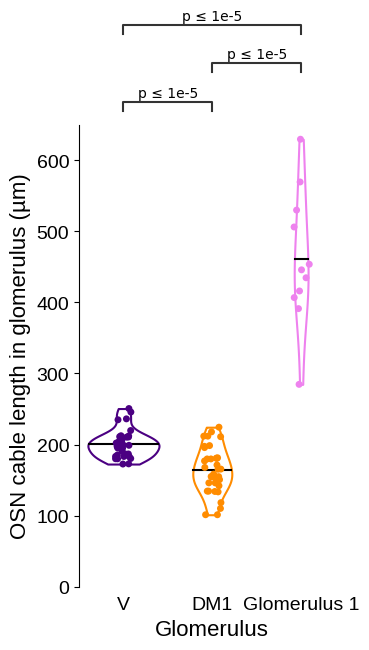

In [47]:
#make cable length plot with annotations, from dataframe
x = "glomerulus"
y = "cable length in glom"
order = ['V', 'DM1', 'Glomerulus 1']
plt.figure(figsize=(6,6))
ax = my_violinplot2(data=flyneurons, x=x, y=y, order=order, color="1")
ax = sns.stripplot(data=flyneurons, x=x, y=y, order=order, palette=["indigo", "darkorange", "violet"])
ax.set_xlabel('Glomerulus', size=16, fontname="Liberation Sans")
ax.set_ylabel('OSN cable length in glomerulus (µm)', size=16, fontname="Liberation Sans")
plt.xticks(fontsize=14, fontname="Liberation Sans")
plt.yticks(fontsize=14, fontname="Liberation Sans")
ax.set_aspect(0.008)
plt.ylim(0,650)
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
add_stat_annotation(ax, data=flyneurons, x=x, y=y, order=order,
                    box_pairs=[("V", "DM1"), ("V", "Glomerulus 1"), ("DM1", "Glomerulus 1")],
                    test='Mann-Whitney', text_format='simple', loc='outside', verbose=2)
plt.savefig('/home/jb534/pymaid_scripts/aedes/aedes/svg/cablelength_MD1_DM1_V.svg', format="svg")
plt.show()

V v.s. DM1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.263e-01 U_stat=5.120e+02
DM1 v.s. Glomerulus 1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.052e-06 U_stat=0.000e+00
V v.s. Glomerulus 1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.513e-06 U_stat=0.000e+00


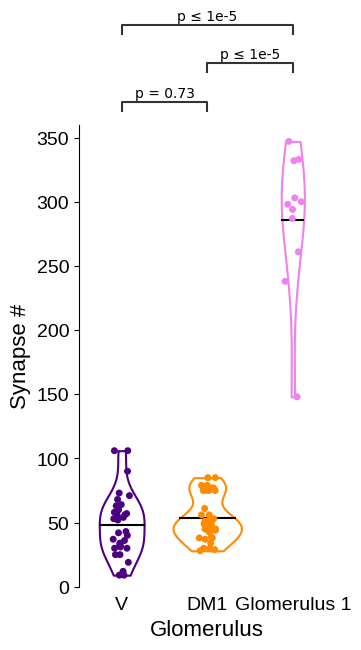

In [48]:
#make plot for recurrent connectivity
x = "glomerulus"
y = "recurrent connections"
order = ['V', 'DM1', 'Glomerulus 1']
plt.figure(figsize=(6,6))
ax = my_violinplot2(data=flyneurons, x=x, y=y, order=order, color="1")
ax = sns.stripplot(data=flyneurons, x=x, y=y, order=order, palette=["indigo", "darkorange", "violet"])
ax.set_xlabel('Glomerulus', size=16, fontname="Liberation Sans")
ax.set_ylabel('Synapse #', size=16, fontname="Liberation Sans")
plt.xticks(fontsize=14, fontname="Liberation Sans")
plt.yticks(fontsize=14, fontname="Liberation Sans")
ax.set_aspect(0.015)
plt.ylim(0,360)
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
add_stat_annotation(ax, data=flyneurons, x=x, y=y, order=order,
                    box_pairs=[("V", "DM1"), ("V", "Glomerulus 1"), ("DM1", "Glomerulus 1")],
                    test='Mann-Whitney', text_format='simple', loc='outside', verbose=2)
plt.savefig('/home/jb534/pymaid_scripts/aedes/aedes/svg/recurrent_fly.svg', format="svg")
plt.show()

In [49]:
#turn feedforward columns into lists, then to a dataframe.

#v bilateral left
v_bilateral_left_final=[]
v_bilateral_left=flyneurons["bilateral left feedforward"].tolist()
for i in v_bilateral_left:
  if str(i) != 'nan':
    v_bilateral_left_final.append(i)
print(v_bilateral_left_final)

[57.0, 37.0, 40.0, 13.0, 33.0, 49.0, 40.0, 37.0, 38.0, 31.0, 8.0, 3.0, 1.0, 8.0, 14.0, 33.0, 10.0, 42.0, 42.0, 37.0, 14.0, 40.0, 33.0, 20.0, 27.0, 23.0, 26.0, 22.0, 25.0, 20.0, 18.0, 24.0, 10.0, 7.0]


In [50]:
#v bilateral right
v_bilateral_right_final=[]
v_bilateral_right=flyneurons["bilateral right feedforward"].tolist()
for i in v_bilateral_right:
  if str(i) != 'nan':
    v_bilateral_right_final.append(i)
print(v_bilateral_right_final)

[46.0, 25.0, 33.0, 19.0, 43.0, 51.0, 63.0, 43.0, 38.0, 44.0, 19.0, 6.0, 2.0, 9.0, 23.0, 16.0, 14.0, 39.0, 37.0, 35.0, 30.0, 33.0, 39.0, 25.0, 27.0, 27.0, 41.0, 24.0, 35.0, 23.0, 26.0, 20.0, 21.0, 7.0]


In [51]:
#v unilateral
Vdf=flyneurons.loc[flyneurons['glomerulus']=='V']
v_unilateral=Vdf['unilateral feedforward'].tolist()

In [52]:
#v total
v_total=Vdf['feedforward total'].tolist()
v_total

[115.0,
 63.0,
 82.0,
 34.0,
 97.0,
 116.0,
 114.0,
 86.0,
 85.0,
 77.0,
 30.0,
 10.0,
 4.0,
 17.0,
 37.0,
 53.0,
 25.0,
 89.0,
 89.0,
 85.0,
 49.0,
 82.0,
 80.0,
 58.0,
 60.0,
 52.0,
 71.0,
 54.0,
 64.0,
 51.0,
 51.0,
 48.0,
 43.0,
 14.0]

In [53]:
#DM1 feedforward list
DM1_df=flyneurons.loc[flyneurons['glomerulus']=='DM1']
DM1_feedforward=DM1_df['unilateral feedforward'].tolist()

In [54]:
#Glomerulus 1 list
Glom1_df=flyneurons.loc[flyneurons['glomerulus']=='Glomerulus 1']
Glom1_feedforward=Glom1_df['unilateral feedforward'].tolist()

In [55]:
print(np.mean(v_bilateral_right_final))
print(np.std(v_bilateral_right_final))
print(np.mean(v_bilateral_left_final))
print(np.std(v_bilateral_left_final))
print(np.mean(v_unilateral))
print(np.std(v_unilateral))
print(np.mean(DM1_feedforward))
print(np.std(DM1_feedforward))
print(np.mean(Glom1_feedforward))
print(np.std(Glom1_feedforward))

28.91176470588235
13.467537543071801
25.941176470588236
13.898669374462536
6.470588235294118
5.013131545179456
78.44444444444444
18.487900614612858
139.36363636363637
25.453246720114926


In [56]:
stats.kruskal(v_bilateral_right_final, v_bilateral_left_final, v_unilateral, v_total, DM1_feedforward, Glom1_feedforward)

KruskalResult(statistic=135.61626759969042, pvalue=1.5281267063715603e-27)

In [57]:
sp.posthoc_dunn([v_bilateral_right_final, v_bilateral_left_final, v_unilateral, v_total, DM1_feedforward, Glom1_feedforward], p_adjust = 'bonferroni')

,1,2,3,4,5,6
1,1.000000e+00,1.000000e+00,1.163085e-03,7.710024e-03,1.355652e-06,5.570769e-07
2,1.000000e+00,1.000000e+00,7.644505e-03,1.174267e-03,8.410462e-08,7.975441e-08
3,1.163085e-03,7.644505e-03,1.000000e+00,1.688718e-12,1.277697e-19,2.058430e-15
4,7.710024e-03,1.174267e-03,1.688718e-12,1.000000e+00,1.000000e+00,3.153756e-02
5,1.355652e-06,8.410462e-08,1.277697e-19,1.000000e+00,1.000000e+00,1.000000e+00
6,5.570769e-07,7.975441e-08,2.058430e-15,3.153756e-02,1.000000e+00,1.000000e+00


In [58]:
#make nicer dataframe

data_dict = {"V Bilateral Right Soma": v_bilateral_right_final,"V Bilateral Left Soma": v_bilateral_left_final, "V Unilateral":v_unilateral, "V total": v_total, "DM1 Unilateral":DM1_feedforward, "1 Unilateral": Glom1_feedforward}
pre_df = {"uPN": [], "feedforward synapses": []}
for glom, dists in data_dict.items():
    glom_list = [glom,]*len(dists)
    pre_df["uPN"].extend(glom_list)    
    pre_df["feedforward synapses"].extend(dists)

df = pd.DataFrame.from_dict(pre_df)

In [59]:
from seaborn.categorical import _ViolinPlotter
class MyVPlot(_ViolinPlotter):
    def draw_quartiles(self, ax, data, support, density, center, split=False, color='k'):
        """Draw the quartiles as lines at width of density."""
        q50 = np.mean(data)
        self.draw_to_density(ax, center, q50, support, density, split,
                             linewidth=self.linewidth, color=color)

def my_violinplot_5(x=None, y=None, hue=None, data=None, order=None, hue_order=None,
                  bw="scott", cut=0, scale="area", scale_hue=True, gridsize=100,
                  width=.8, inner="quartiles", split=False, dodge=True, orient=None,
                  linewidth=None, color=None, palette=None, saturation=.75,alpha=1,
                  ax=None, edgecolor=None, **kwargs):

    plotter = MyVPlot(x, y, hue, data, order, hue_order,
                      bw, cut, scale, scale_hue, gridsize,
                      width, inner, split, dodge, orient, linewidth,
                      color, palette, saturation)
    if ax is None:
        ax = plt.gca()

    plotter.plot(ax)
    # change outlines
    colors=["blueviolet", "purple", 'indigo', 'slateblue', "darkorange", "violet"]
    for idx, violin in enumerate(ax.collections):
        violin.set_edgecolor(colors[idx])
    for l in ax.lines:
        l.set_linestyle('-')
        l.set_color('k')
    return ax

V Bilateral Left Soma v.s. V Unilateral: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.266e-07 U_stat=1.037e+03
V total v.s. DM1 Unilateral: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.789e-02 U_stat=3.915e+02
DM1 Unilateral v.s. 1 Unilateral: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.306e-05 U_stat=1.250e+01
V total v.s. 1 Unilateral: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.049e-05 U_stat=9.500e+00
V Unilateral v.s. 1 Unilateral: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.672e-06 U_stat=0.000e+00
V Bilateral Left Soma v.s. DM1 Unilateral: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.500e-11 U_stat=2.400e+01
V Bilateral Left Soma v.s. 1 Unilateral: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.806e-06 U_stat=0.000e+00


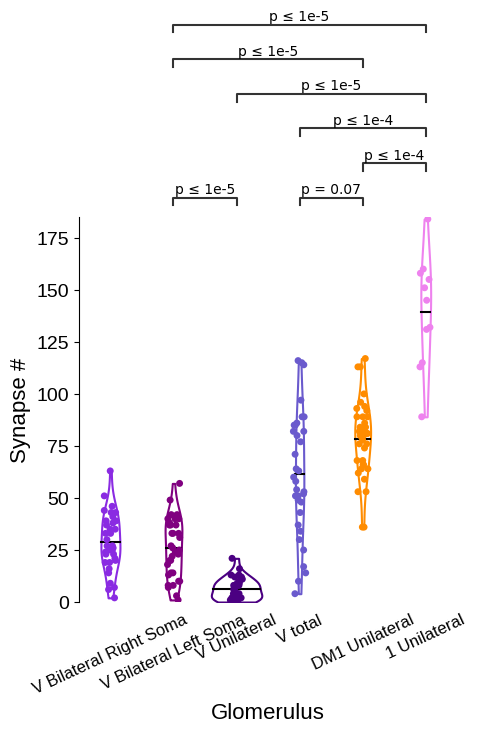

In [60]:
#make plot with annotations, from dataframe
x = "uPN"
y = "feedforward synapses"
order = ['V Bilateral Right Soma', 'V Bilateral Left Soma', "V Unilateral", 'V total', 'DM1 Unilateral', '1 Unilateral']
plt.figure(figsize=(5,5))
ax = my_violinplot_5(data=df, x=x, y=y, order=order, color="1")
ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["blueviolet", "purple", 'indigo', 'slateblue', "darkorange", "violet"])
ax.set_xlabel('Glomerulus', size=16, fontname="Liberation Sans")
ax.set_ylabel('Synapse #', size=16, fontname="Liberation Sans")
#ax.set(rc={'figure.figsize':(11.7,8.27)})
ax.set_aspect(0.033)
plt.ylim(0,185)
plt.xticks(rotation=25)
plt.xticks(fontsize=12, fontname="Liberation Sans")
plt.yticks(fontsize=14, fontname="Liberation Sans")
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    box_pairs=[("V Bilateral Left Soma", "1 Unilateral"), ("V Bilateral Left Soma", "V Unilateral"), ("1 Unilateral", "V Unilateral"), ("V Bilateral Left Soma", "DM1 Unilateral"), ("V total", "DM1 Unilateral"), ("V total", "1 Unilateral"), ("DM1 Unilateral", "1 Unilateral")],
                    test='Mann-Whitney', text_format='simple', loc='outside', verbose=2)
plt.savefig('/home/jb534/pymaid_scripts/aedes/aedes/svg/VDM1MD1feedforward.svg', format="svg")
plt.show()

In [61]:
df=pd.read_csv('/home/jb534/pymaid_scripts/aedes/aedes/csvs/flyneuron_cable_inglom.csv')
df

,Unnamed: 0,id,total cable length,cable length in glom,unilateral feedforward,bilateral left feedforward,bilateral right feedforward,recurrent connections,glomerulus,feedforward total
0,0,720575940619419757,600303.713435,134.017044,81,NaN,NaN,43.0,DM1,NaN
1,1,720575940629918762,586441.875243,134.508685,53,NaN,NaN,77.0,DM1,NaN
2,2,720575940632224031,589470.920047,181.379494,117,NaN,NaN,61.0,DM1,NaN
3,3,720575940637447514,611133.654214,154.915112,89,NaN,NaN,46.0,DM1,NaN
4,4,720575940614559163,672171.160246,150.689067,84,NaN,NaN,79.0,DM1,NaN
...,...,...,...,...,...,...,...,...,...,...
76,76,type CatmaidNeuron\nname ...,536363.625000,391.274063,145,NaN,NaN,333.0,Glomerulus 1,NaN
77,77,type CatmaidNeuron\nname ...,477346.125000,416.095000,184,NaN,NaN,294.0,Glomerulus 1,NaN
78,78,type CatmaidNeuron\nname ...,622672.937500,529.873438,151,NaN,NaN,303.0,Glomerulus 1,NaN
79,79,type CatmaidNeuron\nname ...,366456.937500,284.710375,89,NaN,NaN,148.0,Glomerulus 1,NaN


In [62]:
#create new column for density of recurrent synapses in glomerulus
df['recurrent_density']=(df['recurrent connections']/df['cable length in glom'])




In [63]:
#create new columns for feedforward synapse densities for each uPN type
df['unilateral feedforward density']=df['unilateral feedforward']/df['cable length in glom']
df['bilateral left feedforward density']=df['bilateral left feedforward']/df['cable length in glom']
df['bilateral right feedforward density']=df['bilateral right feedforward']/df['cable length in glom']
df['total feedforward density']=df['feedforward total']/df['cable length in glom']

In [64]:
#create lists for feedforward connectivity densities

#v unilateral uPN density
Vdf=df.loc[df['glomerulus']=='V']
v_unilateral_density=Vdf['unilateral feedforward density'].tolist()

#v left bilateral and right bilateral
v_bilateral_left_density=Vdf['bilateral left feedforward density'].tolist()
v_bilateral_right_density=Vdf['bilateral right feedforward density'].tolist()

#v total
v_total_density=Vdf['total feedforward density'].tolist()

#DM1 OSN --> uPN density
DM1df=df.loc[df['glomerulus']=='DM1']
dm1_feedforward_density=DM1df['unilateral feedforward density'].tolist()

#Glom 1  OSN --> uPN density
Glom1df=df.loc[df['glomerulus']=='Glomerulus 1']
glom1_feedforward_density=Glom1df['unilateral feedforward density'].tolist()

In [65]:
stats.kruskal(v_bilateral_right_density, v_bilateral_left_density, v_unilateral_density, v_total_density, dm1_feedforward_density, glom1_feedforward_density)


KruskalResult(statistic=134.3227602440234, pvalue=2.8766661613563297e-27)

In [66]:
sp.posthoc_dunn([v_bilateral_right_density, v_bilateral_left_density, v_unilateral_density, v_total_density, dm1_feedforward_density, glom1_feedforward_density], p_adjust = 'bonferroni')

,1,2,3,4,5,6
1,1.000000e+00,1.000000e+00,1.436975e-03,7.560162e-03,8.010704e-10,8.340633e-02
2,1.000000e+00,1.000000e+00,8.661881e-03,1.234388e-03,3.173491e-11,2.966385e-02
3,1.436975e-03,8.661881e-03,1.000000e+00,2.381304e-12,1.076834e-24,5.689290e-07
4,7.560162e-03,1.234388e-03,2.381304e-12,1.000000e+00,3.630097e-02,1.000000e+00
5,8.010704e-10,3.173491e-11,1.076834e-24,3.630097e-02,1.000000e+00,1.000000e+00
6,8.340633e-02,2.966385e-02,5.689290e-07,1.000000e+00,1.000000e+00,1.000000e+00


In [67]:
#make nicer dataframe

data_dict = {"V Bilateral Right Soma": v_bilateral_right_density,"V Bilateral Left Soma": v_bilateral_left_density, "V Unilateral":v_unilateral_density, "V total":v_total_density, "DM1 Unilateral":dm1_feedforward_density, "1 Unilateral":glom1_feedforward_density}
pre_df = {"uPN": [], "feedforward synapses density": []}
for glom, dists in data_dict.items():
    glom_list = [glom,]*len(dists)
    pre_df["uPN"].extend(glom_list)    
    pre_df["feedforward synapses density"].extend(dists)

feedforward_density = pd.DataFrame.from_dict(pre_df)

V Bilateral Left Soma v.s. V Unilateral: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.730e-07 U_stat=1.026e+03
V total v.s. DM1 Unilateral: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.144e-05 U_stat=2.360e+02
DM1 Unilateral v.s. 1 Unilateral: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.846e-04 U_stat=3.590e+02
V total v.s. 1 Unilateral: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.790e+02
V Unilateral v.s. 1 Unilateral: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.864e-06 U_stat=0.000e+00
V Bilateral Left Soma v.s. DM1 Unilateral: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.664e-12 U_stat=0.000e+00
V Bilateral Left Soma v.s. 1 Unilateral: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.002e-05 U_stat=1.800e+01


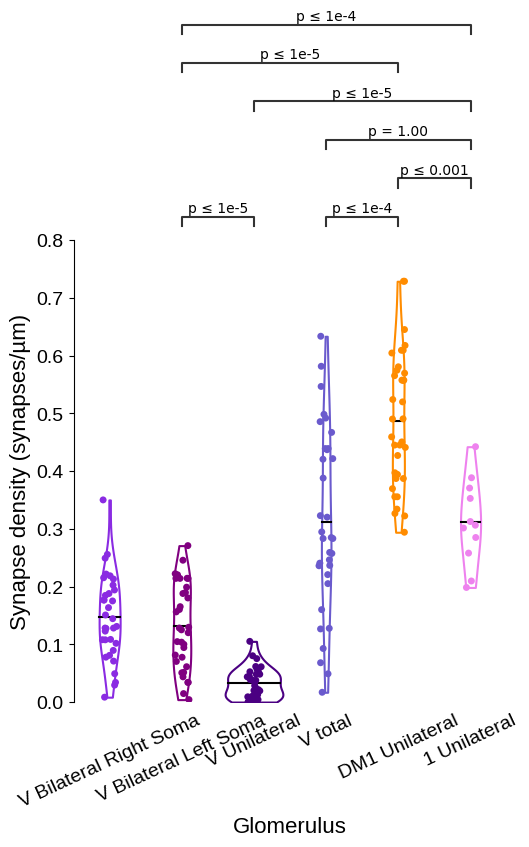

In [68]:
#plot feedforward connectivity denstiy
x = "uPN"
y = "feedforward synapses density"
order = ['V Bilateral Right Soma', 'V Bilateral Left Soma', "V Unilateral", 'V total', 'DM1 Unilateral', '1 Unilateral']
plt.figure(figsize=(6,6))
ax = my_violinplot_5(data=feedforward_density, x=x, y=y, order=order, color="1")
ax = sns.stripplot(data=feedforward_density, x=x, y=y, order=order, palette=["blueviolet", "purple", 'indigo', 'slateblue', "darkorange", "violet"])
ax.set_xlabel('Glomerulus', size=16, fontname="Liberation Sans")
ax.set_ylabel('Synapse density (synapses/µm)', size=16, fontname="Liberation Sans")
#ax.set(rc={'figure.figsize':(11.7,8.27)})
ax.set_aspect(8)
plt.ylim(0,0.8)
plt.xticks(rotation=25)
plt.xticks(fontsize=14, fontname="Liberation Sans")
plt.yticks(fontsize=14, fontname="Liberation Sans")
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
add_stat_annotation(ax, data=feedforward_density, x=x, y=y, order=order,
                    box_pairs=[("V Bilateral Left Soma", "1 Unilateral"), ("V Bilateral Left Soma", "V Unilateral"), ("1 Unilateral", "V Unilateral"), ("V Bilateral Left Soma", "DM1 Unilateral"), ("V total", "DM1 Unilateral"), ("V total", "1 Unilateral"), ("DM1 Unilateral", "1 Unilateral")],
                    test='Mann-Whitney', text_format='simple', loc='outside', verbose=2)
plt.savefig('/home/jb534/pymaid_scripts/aedes/aedes/svg/VDM1MD1feedforward_density.svg', format="svg")
plt.show()

V v.s. DM1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.174e-02 U_stat=3.660e+02
DM1 v.s. Glomerulus 1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.680e-05 U_stat=3.000e+01
V v.s. Glomerulus 1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.413e-06 U_stat=1.000e+01


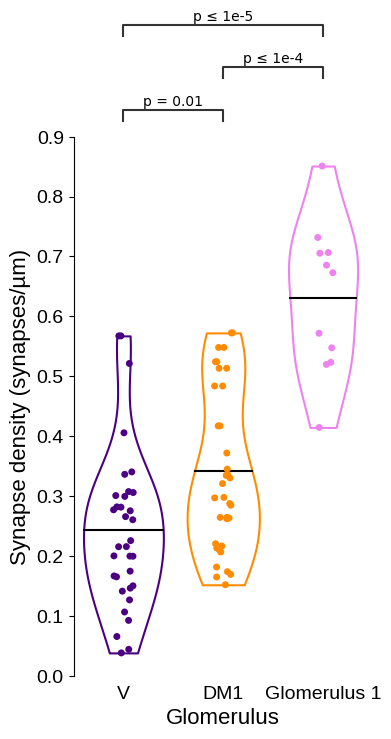

In [69]:
#make plot for recurrent connectivity DENSITY
x = "glomerulus"
y = "recurrent_density"
order = ['V', 'DM1', 'Glomerulus 1']
plt.figure(figsize=(7,7))
ax = my_violinplot2(data=df, x=x, y=y, order=order, color="1")
ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["indigo", "darkorange", "violet"])
ax.set_xlabel('Glomerulus', size=16, fontname="Liberation Sans")
ax.set_ylabel('Synapse density (synapses/µm)', size=16, fontname="Liberation Sans")
plt.xticks(fontsize=14, fontname="Liberation Sans")
plt.yticks(fontsize=14, fontname="Liberation Sans")
plt.ylim(0,0.9)
ax.set_aspect(6)
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    box_pairs=[("V", "DM1"), ("V", "Glomerulus 1"), ("DM1", "Glomerulus 1")],
                    test='Mann-Whitney', text_format='simple', loc='outside', verbose=2)
plt.savefig('/home/jb534/pymaid_scripts/aedes/aedes/svg/recurrent_density_fly.svg', format="svg")
plt.show()